In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dedrone/North_America-United_States.csv")

 **Explore the dataset**

In [4]:
df.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9383068,840,USA44621,44621,24 June 2022,2022,1,Protests,Excessive force against protesters,Protesters (United States),...,Cedar Rapids,41.9738,-91.6768,1,KCRG-TV9; Network Contagion Research Institute...,Local partner-National,"On 24 June 2022, 'pro-choice' protesters gathe...",0,1656458658,USA
1,9383099,840,USA44775,44775,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Fayetteville,36.0626,-94.1574,1,Southwest Times Record; 40/29,Subnational,"On 24 June 2022, well over 100 people includin...",0,1656458658,USA
2,9383100,840,USA44783,44783,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Eureka,40.8040,-124.1654,1,Lost Coast Outpost; North Coast Journal,Subnational,"On 24 June 2022, hundreds of people rallied ou...",0,1656458658,USA
3,9383101,840,USA44788,44788,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,West Hollywood,34.0900,-118.3617,1,CBS News; Liveuamap,Local partner-New media,"On 24 June 2022, hundreds of people rallied in...",0,1656458658,USA
4,9383102,840,USA44793,44793,24 June 2022,2022,1,Protests,Peaceful protest,Protesters (United States),...,Monterey,36.6031,-121.8936,1,Monterey County Herald; KSBW8,Subnational,"On 24 June 2022, hundreds of people rallied at...",0,1656458658,USA


In [5]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [6]:
#Get a summary of dataframe
print("Shape:", df.shape)

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Shape: (42253, 31)
Missing values:
 data_id                 0
iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1        9861
inter1                  0
actor2              38371
assoc_actor_2       41101
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                 67
admin3              42253
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
iso3                    0
dtype: int64


In [7]:
data_types = df.dtypes
print("data_types:\n", data_types)

data_types:
 data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty      int64
event_date           object
year                  int64
time_precision        int64
event_type           object
sub_event_type       object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3              float64
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object


**Clean and visualize the dataset**

In [8]:
# actor2, assoc_actor_2, admin3 have lots of missing values from our previous observation. Drop.
columns_to_drop = ['actor2', 'assoc_actor_2', 'admin3']
protest_data = df.drop(columns = columns_to_drop)

# Convert event_date to datetime format: 24-June-2022 to 2022-06-24
protest_data['event_date'] = pd.to_datetime(protest_data['event_date'])
protest_data.head(1)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,9383068,840,USA44621,44621,2022-06-24,2022,1,Protests,Excessive force against protesters,Protesters (United States),...,Cedar Rapids,41.9738,-91.6768,1,KCRG-TV9; Network Contagion Research Institute...,Local partner-National,"On 24 June 2022, 'pro-choice' protesters gathe...",0,1656458658,USA


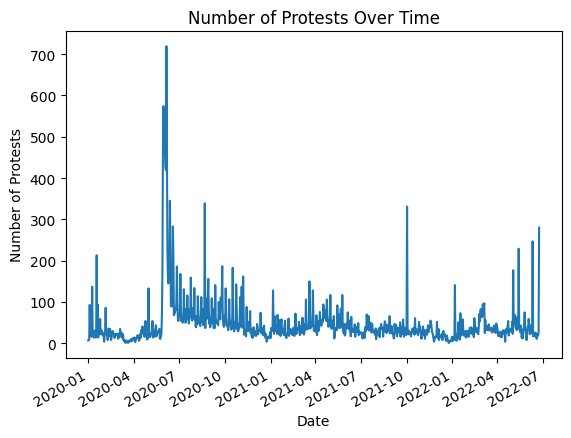

In [9]:
# After converting datetime, visualize the number of protests over time

protest_data['event_date'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Protests Over Time")
plt.xlabel("Date")
plt.ylabel('Number of Protests')
plt.show()

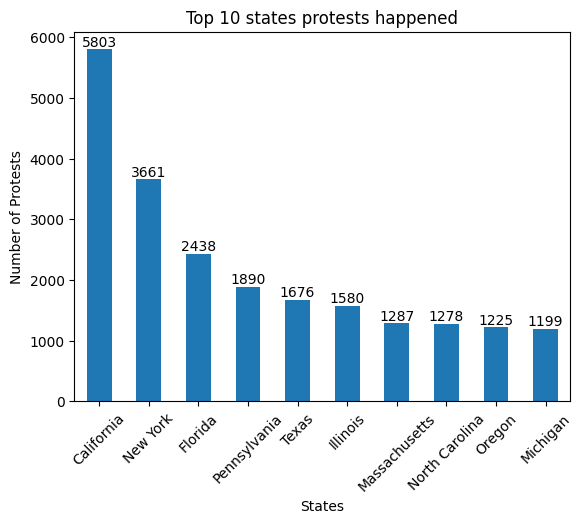

In [10]:
# Visualize the states with the protests

top_states = protest_data['admin1'].value_counts().head(10)

ax = top_states.plot(kind='bar')
plt.title("Top 10 states protests happened")
plt.xlabel("States")
plt.xticks(rotation=45)
plt.ylabel('Number of Protests')

# Annotate each bar with its number
for i, value in enumerate(top_states):
    plt.text(i, value, f'{top_states[i]:}', ha='center', va='bottom')

plt.show()


In [11]:
#https://www.kaggle.com/code/chandancharchitsahoo/visualize-maps-using-folium/notebook#Choropleth-Maps-
import folium
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Latitude and longitude of the US center

# Add points for each protest event
protest = folium.map.FeatureGroup()
for lat, lng in zip(protest_data['latitude'], protest_data['longitude']):
  protest.add_child(
      folium.features.CircleMarker(
          [lat, lng],
          radius=1,
          color='red',
          fill=True,
          fill_color='yellow',
          fill_opacity=0.6
      )
  )


# Display the map
us_map.add_child(protest)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Dig into Cali

# National data
total_events = len(protest_data)
rioters_events = len(protest_data[protest_data['actor1'] == 'Rioters (United States)'])

rioters_ratio = rioters_events / total_events

# Cali data

california_events = protest_data[protest_data['admin1'] == 'California']
total_california_events = len(california_events)
rioters_in_california = len(california_events[california_events['actor1'] == 'Rioters (United States)'])
rioters_ratio_in_california = rioters_in_california / total_california_events

# NY data
ny_events = protest_data[protest_data['admin1'] == 'New York']
total_ny_events = len(ny_events)
rioters_in_ny = len(ny_events[ny_events['actor1'] == 'Rioters (United States)'])
rioters_ratio_in_ny = rioters_in_ny / total_ny_events

# FL data
fl_events = protest_data[protest_data['admin1'] == 'Florida']
total_fl_events = len(fl_events)
rioters_in_fl = len(fl_events[fl_events['actor1'] == 'Rioters (United States)'])
rioters_ratio_in_fl = rioters_in_fl / total_fl_events

print('Nation rioter event ratio: {}, CA rioter event ratio: {}, NY rioter event ratio: {}, FL rioter event ratio: {}'.format(rioters_ratio, rioters_ratio_in_california, rioters_ratio_in_ny, rioters_ratio_in_fl))

Nation rioter event ratio: 0.025370979575414763, CA rioter event ratio: 0.028950542822677925, NY rioter event ratio: 0.02403714832013111, FL rioter event ratio: 0.01435602953240361


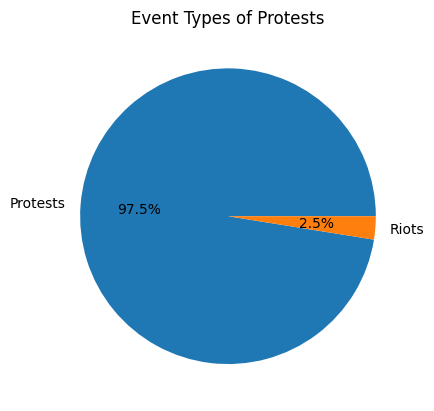

In [13]:
# Visualize the event types of the protests

event_type_counts = protest_data['event_type'].value_counts()
total_events = event_type_counts.sum()
percentages = (event_type_counts / total_events) * 100

plt.pie(event_type_counts, labels=event_type_counts.index, autopct='%1.1f%%')
plt.title("Event Types of Protests")
plt.show()

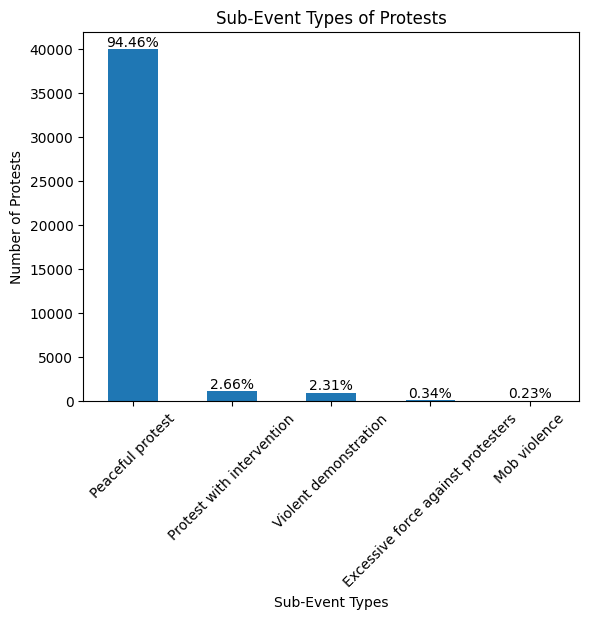

In [14]:
# Visualize the sub-event types of the protests

sub_event_type_counts = protest_data['sub_event_type'].value_counts()
total_sub_events = sub_event_type_counts.sum()
percentages = (sub_event_type_counts / total_sub_events) * 100

protest_data['sub_event_type'].value_counts().plot(kind='bar')
plt.title("Sub-Event Types of Protests")
plt.xlabel("Sub-Event Types")
plt.xticks(rotation=45)
plt.ylabel('Number of Protests')

# Annotate each bar with its percentage
for i, value in enumerate(sub_event_type_counts):
    plt.text(i, value, f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()

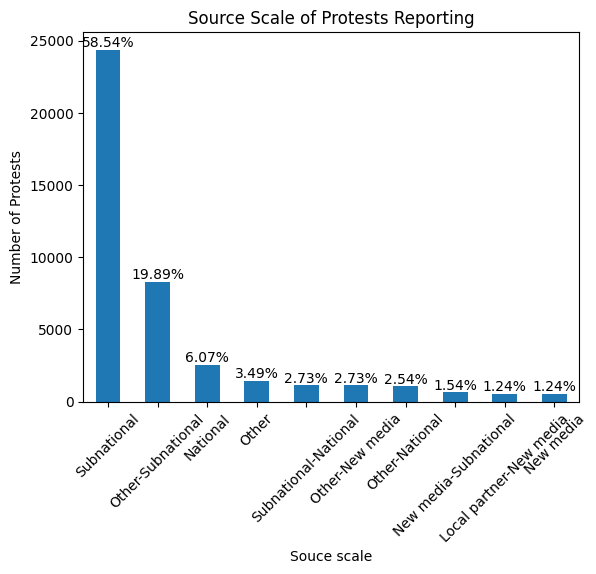

In [15]:
# Visualize the source_scale of the protests

source_scale_counts = protest_data['source_scale'].value_counts().head(10)
total_events = source_scale_counts.sum()
percentages = (source_scale_counts / total_events) * 100

ax = source_scale_counts.plot(kind='bar')
plt.title("Source Scale of Protests Reporting")
plt.xlabel("Souce scale")
plt.xticks(rotation=45)
plt.ylabel('Number of Protests')

# Annotate each bar with its percentage
for i, value in enumerate(source_scale_counts):
    plt.text(i, value, f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.show()


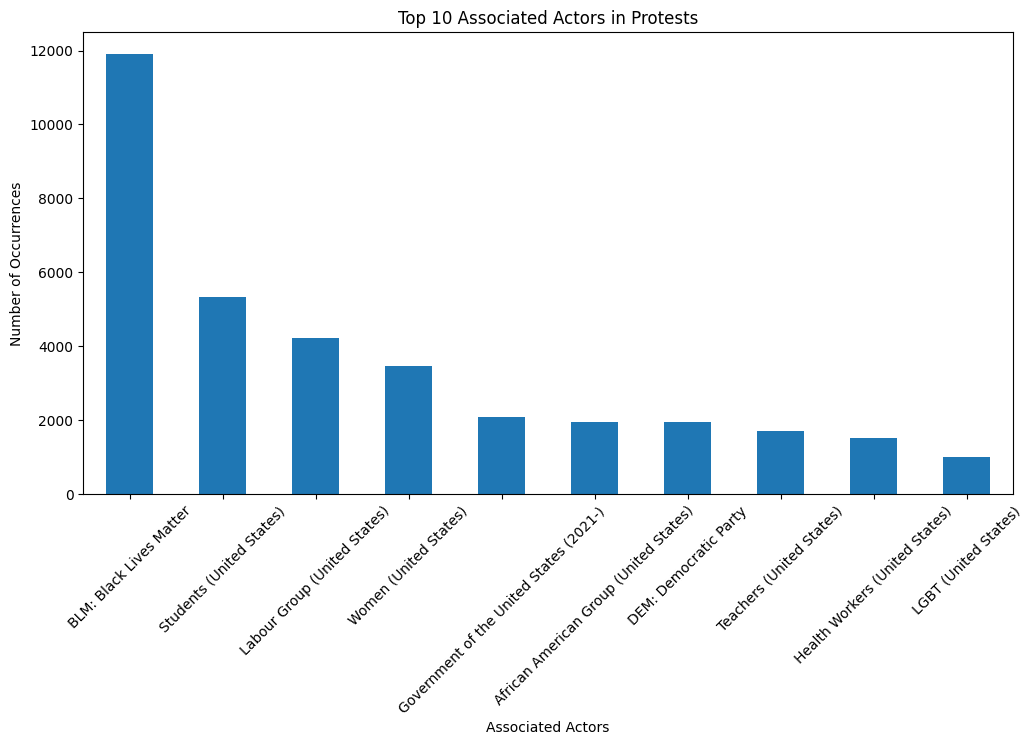

In [16]:
#Visualize the associate actor of the protests and split associate actor into multiply columns

assoc_actor_1_split = protest_data['assoc_actor_1'].dropna().str.split(";")
assoc_actor_list = [item.strip() for sublist in assoc_actor_1_split for item in sublist]

assoc_actor_count = pd.Series(assoc_actor_list).value_counts()

plt.figure(figsize=(12, 6))
assoc_actor_count.head(10).plot(kind='bar')
plt.title('Top 10 Associated Actors in Protests')
plt.xlabel('Associated Actors')
plt.xticks(rotation=45)
plt.ylabel('Number of Occurrences')

plt.show()

In [17]:
categories = [
    "BLM: Black Lives Matter",
    "Students (United States)",
    "Labour Group (United States)",
    "Women (United States)",
    "Government of the United States (2021-)",
    "African American Group (United States)",
    "DEM: Democratic Party",
    "Teachers (United States)",
    "Health Workers (United States)",
    "LGBT (United States)",
    "Others"
]

# Add a column for each category in the DataFrame
for category in categories:
    protest_data[category] = False

# Function to update category columns
def update_categories(row):
    if pd.isna(row['assoc_actor_1']):
        return row

    actors = row['assoc_actor_1'].split(';')
    found_categories = [actor.strip() for actor in actors]

    for category in found_categories:
      if category in categories:
        row[category] = True
      else:
        row['Others'] = True

    return row

# Apply the function to each row and drop the original assoc_actor_1
protest_data = protest_data.apply(update_categories, axis=1)
protest_data = protest_data.drop(columns = 'assoc_actor_1')

In [18]:
protest_data.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,Students (United States),Labour Group (United States),Women (United States),Government of the United States (2021-),African American Group (United States),DEM: Democratic Party,Teachers (United States),Health Workers (United States),LGBT (United States),Others
0,9383068,840,USA44621,44621,2022-06-24,2022,1,Protests,Excessive force against protesters,Protesters (United States),...,False,False,True,False,False,False,False,False,False,False
1,9383099,840,USA44775,44775,2022-06-24,2022,1,Protests,Peaceful protest,Protesters (United States),...,False,False,True,False,False,True,False,False,False,False
2,9383100,840,USA44783,44783,2022-06-24,2022,1,Protests,Peaceful protest,Protesters (United States),...,False,False,True,False,False,False,False,False,False,False
3,9383101,840,USA44788,44788,2022-06-24,2022,1,Protests,Peaceful protest,Protesters (United States),...,False,False,True,True,False,False,False,False,False,False
4,9383102,840,USA44793,44793,2022-06-24,2022,1,Protests,Peaceful protest,Protesters (United States),...,False,False,True,False,False,False,False,False,False,False


In [19]:
rioters_data = protest_data[protest_data['actor1'] == 'Rioters (United States)']

categories_counts = {
    "BLM: Black Lives Matter": rioters_data["BLM: Black Lives Matter"].sum(),
    "Students (United States)": rioters_data["Students (United States)"].sum(),
    "Labour Group (United States)": rioters_data["Labour Group (United States)"].sum(),
    "Women (United States)": rioters_data["Women (United States)"].sum(),
    "Government of the United States (2021-)": rioters_data["Government of the United States (2021-)"].sum(),
    "African American Group (United States)": rioters_data["African American Group (United States)"].sum(),
    "DEM: Democratic Party": rioters_data["DEM: Democratic Party"].sum(),
    "Teachers (United States)": rioters_data["Teachers (United States)"].sum(),
    "Health Workers (United States)": rioters_data["Health Workers (United States)"].sum(),
    "LGBT (United States)": rioters_data["LGBT (United States)"].sum(),
    "Others": rioters_data["Others"].sum()
}

categories_counts


{'BLM: Black Lives Matter': 687,
 'Students (United States)': 21,
 'Labour Group (United States)': 6,
 'Women (United States)': 33,
 'Government of the United States (2021-)': 2,
 'African American Group (United States)': 17,
 'DEM: Democratic Party': 8,
 'Teachers (United States)': 3,
 'Health Workers (United States)': 6,
 'LGBT (United States)': 19,
 'Others': 371}

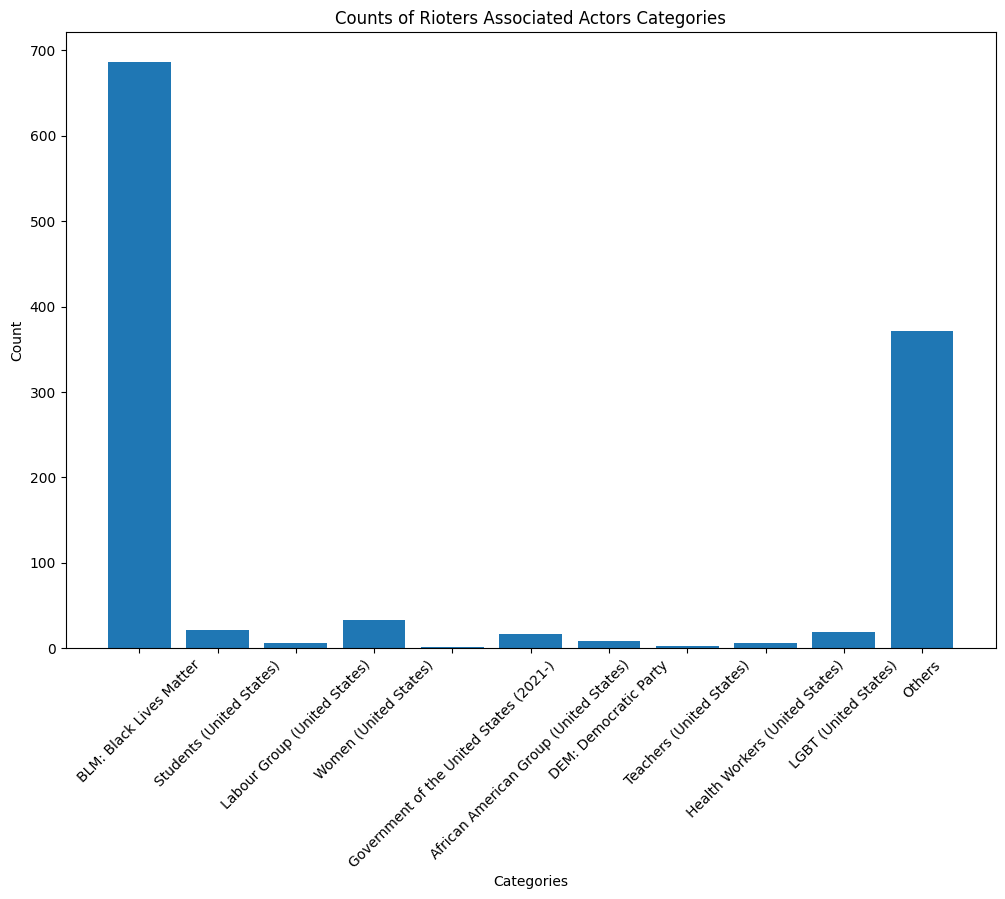

In [20]:
plt.figure(figsize=(12, 8))
plt.bar(categories_counts.keys(), categories_counts.values())
plt.title('Counts of Rioters Associated Actors Categories')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

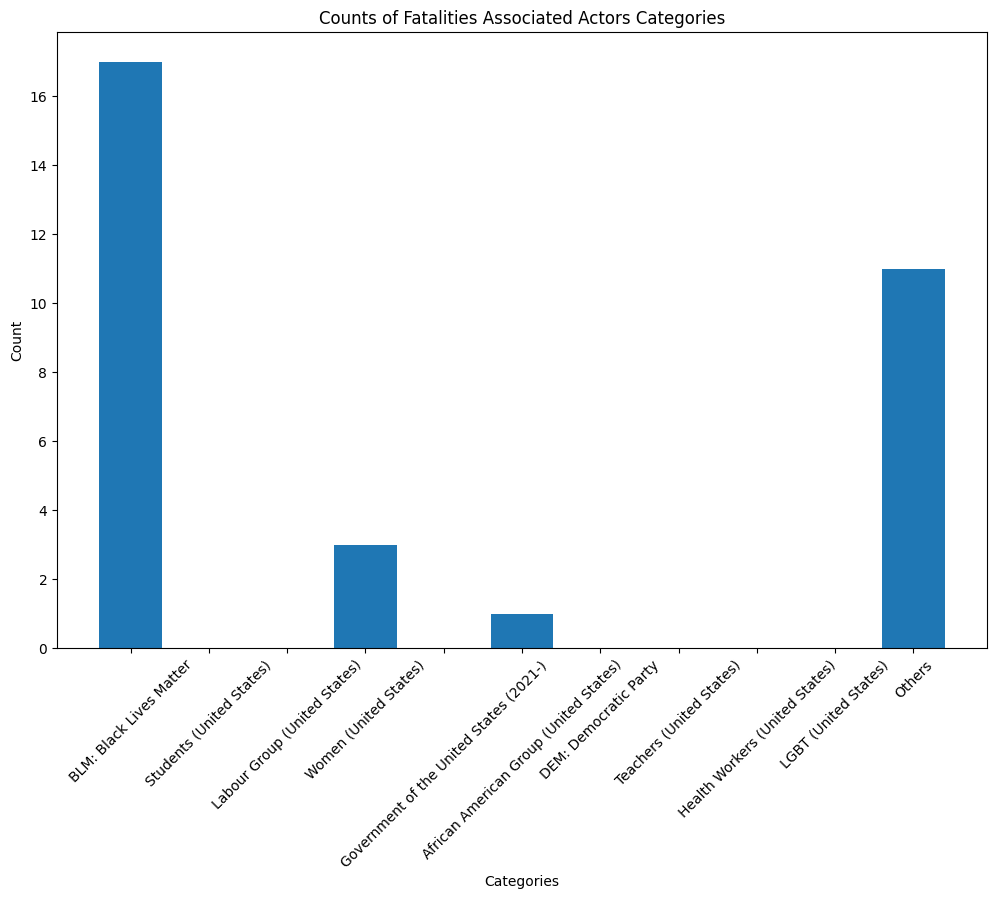

In [21]:
# Digging more
fatalities_data = protest_data[protest_data['fatalities'] != 0]

categories_counts = {
    "BLM: Black Lives Matter": fatalities_data["BLM: Black Lives Matter"].sum(),
    "Students (United States)": fatalities_data["Students (United States)"].sum(),
    "Labour Group (United States)": fatalities_data["Labour Group (United States)"].sum(),
    "Women (United States)": fatalities_data["Women (United States)"].sum(),
    "Government of the United States (2021-)": fatalities_data["Government of the United States (2021-)"].sum(),
    "African American Group (United States)": fatalities_data["African American Group (United States)"].sum(),
    "DEM: Democratic Party": fatalities_data["DEM: Democratic Party"].sum(),
    "Teachers (United States)": fatalities_data["Teachers (United States)"].sum(),
    "Health Workers (United States)": fatalities_data["Health Workers (United States)"].sum(),
    "LGBT (United States)": fatalities_data["LGBT (United States)"].sum(),
    "Others": fatalities_data["Others"].sum()
}

plt.figure(figsize=(12, 8))
plt.bar(categories_counts.keys(), categories_counts.values())
plt.title('Counts of Fatalities Associated Actors Categories')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('people', 29341), ('report', 19319), ('support', 19049), ('police', 16778), ('protest', 15630), ('gathered', 14815), ('black', 14715), ('lives', 12352), ('matter', 11735), ('movement', 11070), ('new', 9548), ('june', 9281), ('outside', 8689), ('brutality', 8322), ('coronavirus', 7846), ('group', 7286), ('members', 6940), ('march', 6632), ('york', 6541), ('rally', 6401)]


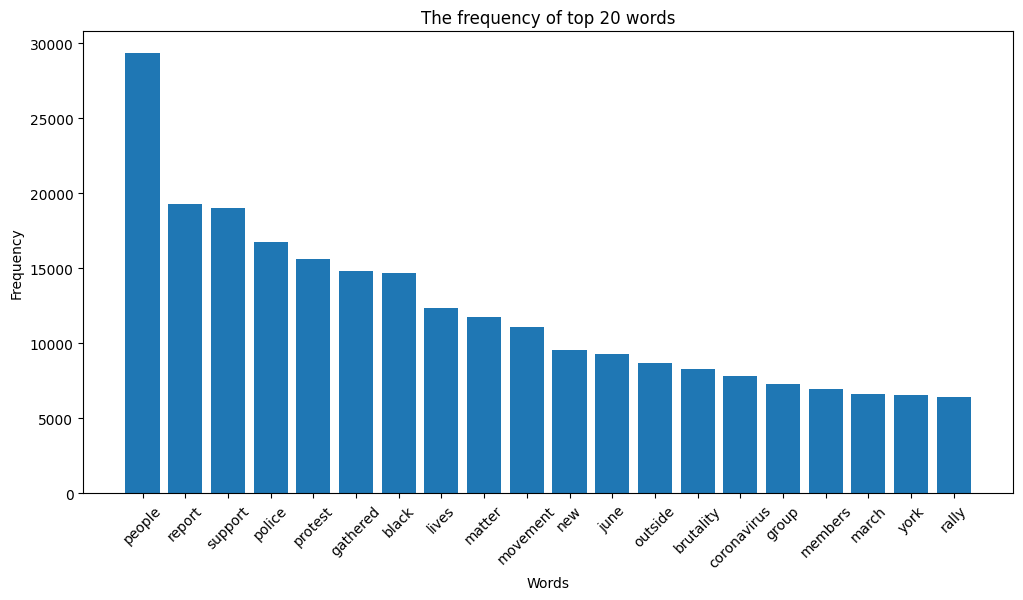

In [24]:
# Basic NLP https://realpython.com/python-nltk-sentiment-analysis/
import nltk
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
notes = ' '.join(protest_data['notes'].dropna())
notes = nltk.tokenize.word_tokenize(notes.lower())

stopwords = nltk.corpus.stopwords.words('english')
words = [word for word in notes if word.isalpha() and word not in stopwords]

word_counts = Counter(words)
top_words = word_counts.most_common(20)
print(top_words)

plt.figure(figsize=(12, 6))
top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
plt.bar(top_words['Word'], top_words['Frequency'])
plt.title('The frequency of top 20 words')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

In [ ]:
import re
protest_data['size'] = 'No report'

for i in range(len(protest_data['notes'])):
  text = protest_data['notes'][i]
# Regular expression to find the size pattern
  size_pattern = r'\[size=([^\]]+)\]'
  match = re.search(size_pattern, text)

  if match:
    size_description = match.group(1)
    protest_data['size'][i] = size_description


In [34]:
protest_data['size'].unique()

array(['no report', 'well over a hundred', 'hundreds', ...,
       'nearly a thousand', 'about a half dozen', 'more than 205'],
      dtype=object)

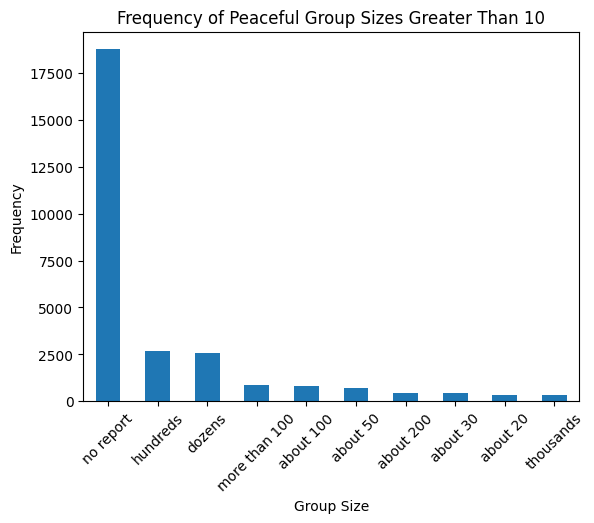

In [40]:
# peaceful protests size
peaceful_data = protest_data[protest_data['actor1'] != 'Rioters (United States)']
peaceful_size = peaceful_data['size']

peaceful_size_counts = peaceful_size.value_counts().head(10)

peaceful_size_counts.plot(kind='bar')
plt.title('Frequency of Peaceful Group Sizes Greater Than 10')
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

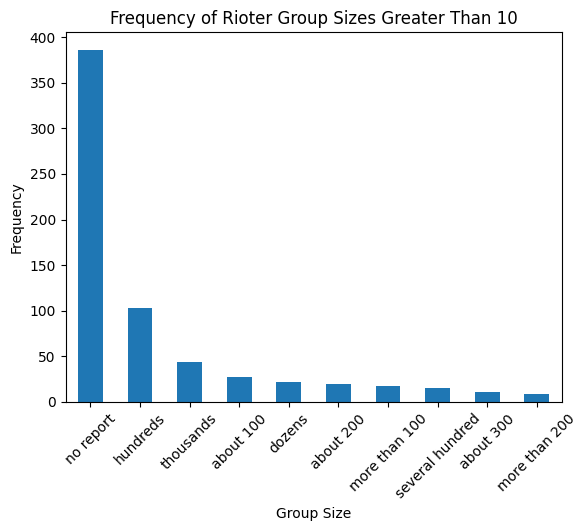

In [43]:
# rioters protests size
rioters_data = protest_data[protest_data['actor1'] == 'Rioters (United States)']
rioters_size = rioters_data['size']

size_counts = rioters_size.value_counts()
rioters_sizes_top_10 = size_counts.head(10)


rioters_sizes_top_10.plot(kind='bar')
plt.title('Frequency of Rioter Group Sizes Greater Than 10')
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

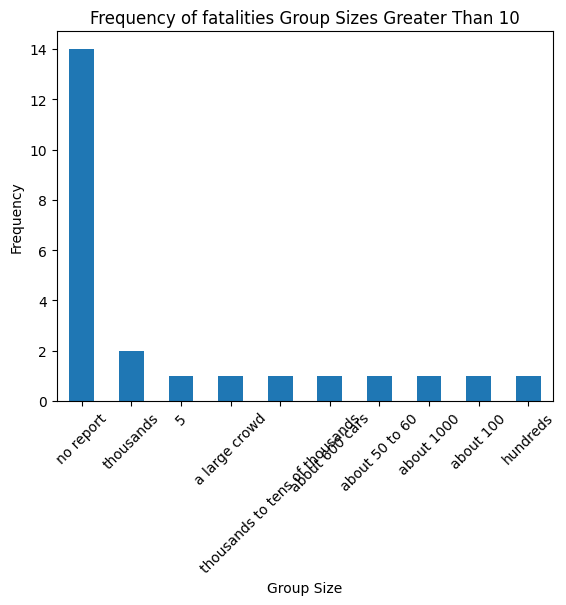

In [44]:
# fatalities protests size
fatalities_data = protest_data[protest_data['fatalities'] != 0]
fatalities_size = fatalities_data['size']

fatalities_size = fatalities_size.value_counts()
fatalities_size_top_10 = fatalities_size.head(10)

fatalities_size_top_10.plot(kind='bar')
plt.title('Frequency of fatalities Group Sizes Greater Than 10')
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()